<a href="https://colab.research.google.com/github/supunabeywickrama/my-colab-work/blob/main/CONTOURS_Drawing%2CHierarchy_and_Modes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image=None, size=10):
  w,h =image.shape[0], image.shape[1]
  aspect_ratio= w/h
  plt.figure(figsize=(size * aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()




In [15]:
!wget https://mydevconnect.com/wp-content/uploads/2025/05/Microsoft-MyDevConnect-scaled.png

--2025-09-24 08:13:39--  https://mydevconnect.com/wp-content/uploads/2025/05/Microsoft-MyDevConnect-scaled.png
Resolving mydevconnect.com (mydevconnect.com)... 35.214.44.243
Connecting to mydevconnect.com (mydevconnect.com)|35.214.44.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75639 (74K) [image/png]
Saving to: ‘Microsoft-MyDevConnect-scaled.png.1’

Microsoft-MyDevConn 100%[===================>]  73.87K   337KB/s    in 0.2s    

2025-09-24 08:13:41 (337 KB/s) - ‘Microsoft-MyDevConnect-scaled.png.1’ saved [75639/75639]



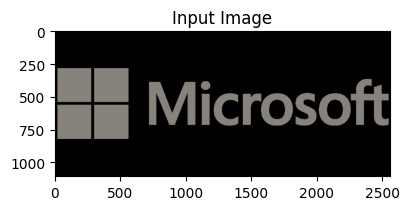

In [16]:
image= cv2.imread("Microsoft-MyDevConnect-scaled.png")
imshow('Input Image',image)

# **Applying cv2.findContours()**

cv2.findContours(image, Retrieval Mode, Approximation Method)

**Retrieval Modes**

. **RETR_LIST** - Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and
they are just contours, ie they all belongs to same hierarchy level.

. **RETR_EXTERNAL** - eturns only extreme outer flags. All child contours are left behind.

. **RETR_CCOMP** - This flag retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its
boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its
contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.

.** RETR_TREE** - It retrieves all the contours and creates a full family hierarchy list.

**Approximation Method Options**

. **cv2.CHAIN_APPROX_NONE**- Stores all the points along the line(inefficient!)

 . **cv2.CHAIN_APPROX_SIMPLE** - Stores the end points of each line

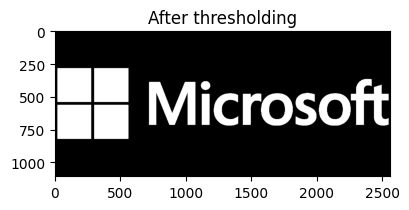

Number of contours = 15


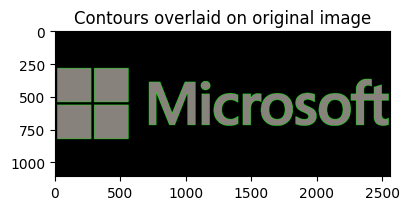

Number of Contours found = 15


In [24]:
image= cv2.imread('Microsoft-MyDevConnect-scaled.png')

# Convert to Grayscale
gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding',th2)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print("Number of contours = " + str(len(contours)))

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd pargmeter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours) ) )

In [25]:
 contours[0]

array([[[299, 563]],

       [[298, 564]],

       [[298, 565]],

       ...,

       [[302, 563]],

       [[301, 563]],

       [[300, 563]]], dtype=int32)

# **What happens if we don't threshold? Bad things.**

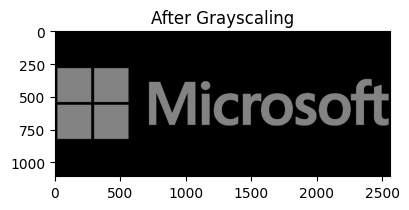

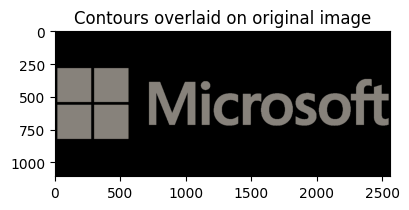

Number of Contours found = 15


In [30]:
image= cv2.imread('Microsoft-MyDevConnect-scaled.png')

# Convert to Grayscale
gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('After Grayscaling',gray)

# Finding Contours
contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, mote this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
#cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)

imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours) ) )

# For findContours to work, the background has to be black and foreground (i.e.
the text or objects)
Otherwise you'll need to invert the image by using cv2 .. bitwise_not(input_image)

- We can use Canny Edges instead of Thresholding

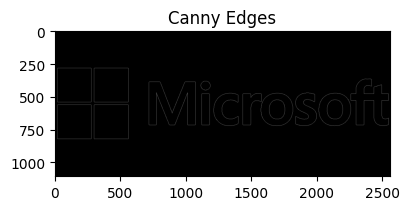

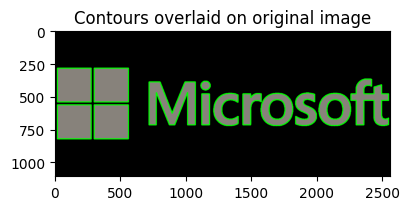

Number of Contours found = 15


In [38]:
image = cv2.imread('Microsoft-MyDevConnect-scaled.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 30, 200)
imshow('Canny Edges', edges)

contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 8)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours) ) )


# Retreival Modes


**Hierachry**

This array stores 4 values for each contour:

- First term is the index of the Next contour

- Second term is the index of the Previous contour

- Third term is the index of the parent contour

- Forth term is the index of the child contour

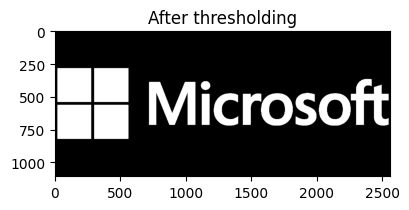

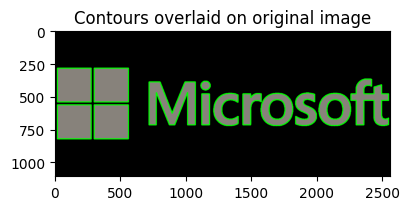

Number of Contours found = 15
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [-1 13 -1 -1]]]


In [40]:
image= cv2.imread('Microsoft-MyDevConnect-scaled.png')

gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding',th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd pargmeter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 8)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours) ) )
print(hierarchy)

# **Contouring Modes**

CHAIN_APPROX_NONE

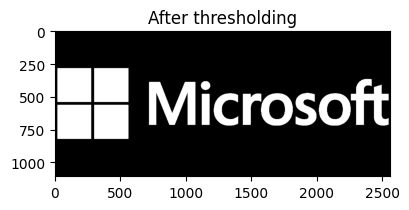

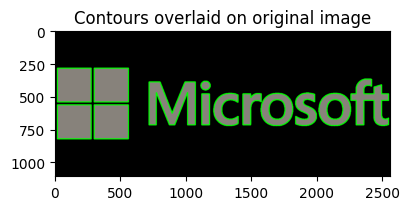

Number of Contours found = 15
[[[299 563]]

 [[298 564]]

 [[298 565]]

 ...

 [[302 563]]

 [[301 563]]

 [[300 563]]]
[[[ 18 563]]

 [[ 18 564]]

 [[ 18 565]]

 ...

 [[ 21 563]]

 [[ 20 563]]

 [[ 19 563]]]
[[[1119  479]]

 [[1118  480]]

 [[1118  481]]

 ...

 [[1122  479]]

 [[1121  479]]

 [[1120  479]]]
[[[1534  477]]

 [[1533  478]]

 [[1532  479]]

 ...

 [[1537  477]]

 [[1536  477]]

 [[1535  477]]]
[[[2120  475]]

 [[2119  476]]

 [[2118  477]]

 ...

 [[2123  475]]

 [[2122  475]]

 [[2121  475]]]
[[[2122  525]]

 [[2123  524]]

 [[2124  524]]

 [[2125  524]]

 [[2126  524]]

 [[2127  524]]

 [[2128  524]]

 [[2129  524]]

 [[2130  524]]

 [[2131  524]]

 [[2132  524]]

 [[2133  524]]

 [[2134  524]]

 [[2135  524]]

 [[2136  524]]

 [[2137  524]]

 [[2138  524]]

 [[2139  524]]

 [[2140  524]]

 [[2141  524]]

 [[2142  524]]

 [[2143  524]]

 [[2144  524]]

 [[2145  524]]

 [[2146  525]]

 [[2146  526]]

 [[2147  526]]

 [[2148  526]]

 [[2149  526]]

 [[2150  526]]

 [[2

In [44]:
image= cv2.imread('Microsoft-MyDevConnect-scaled.png')

gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding',th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd pargmeter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 8)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours) ) )
for c in contours:
  print(c)

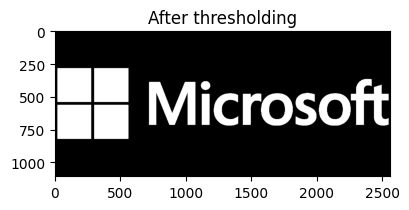

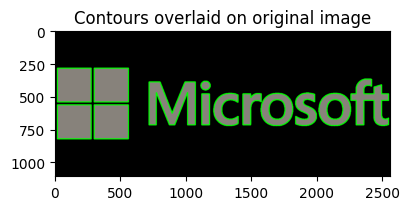

Number of Contours found = 15
[[[299 563]]

 [[298 564]]

 [[298 823]]

 [[558 823]]

 [[558 822]]

 [[559 821]]

 [[559 566]]

 [[558 565]]

 [[558 564]]

 [[557 563]]]
[[[ 18 563]]

 [[ 18 823]]

 [[275 823]]

 [[275 563]]]
[[[1119  479]]

 [[1118  480]]

 [[1118  716]]

 [[1175  716]]

 [[1176  715]]

 [[1177  715]]

 [[1177  481]]

 [[1176  481]]

 [[1175  480]]

 [[1175  479]]]
[[[1534  477]]

 [[1532  479]]

 [[1524  479]]

 [[1524  480]]

 [[1522  482]]

 [[1518  482]]

 [[1518  483]]

 [[1517  484]]

 [[1514  484]]

 [[1514  485]]

 [[1513  486]]

 [[1512  486]]

 [[1511  487]]

 [[1510  487]]

 [[1510  488]]

 [[1509  489]]

 [[1507  489]]

 [[1507  490]]

 [[1506  491]]

 [[1505  491]]

 [[1502  494]]

 [[1502  495]]

 [[1501  496]]

 [[1500  496]]

 [[1500  498]]

 [[1499  499]]

 [[1498  499]]

 [[1498  500]]

 [[1497  501]]

 [[1496  501]]

 [[1496  503]]

 [[1495  504]]

 [[1494  504]]

 [[1493  505]]

 [[1493  506]]

 [[1492  507]]

 [[1491  506]]

 [[1491  485]]

 [[149

In [45]:
image= cv2.imread('Microsoft-MyDevConnect-scaled.png')

gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding',th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd pargmeter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 8)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours) ) )
for c in contours:
  print(c)